# Assignment 3: Unsupervised learning for red wine characteristics

In [0]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# First, import the red wine csv file into a pandas dataframe from the [following website](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis:

In [3]:
df_red_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
scaler = StandardScaler()
arr_red_wine_scaled = scaler.fit_transform(df_red_wine)
df_red_wine_scaled = pd.DataFrame(arr_red_wine_scaled,
                                  columns = df_red_wine.columns,
                                  index = df_red_wine.index)
df_red_wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


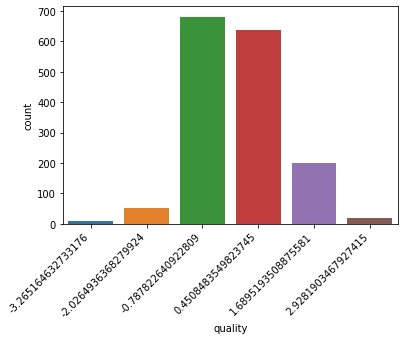

In [5]:
plt.figure()
chart = sns.countplot(x = 'quality', data = df_red_wine_scaled)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

# 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality.
(Assume all variables are continuous.)

Will first try 2 clusters (try to get high/low) and move up to 6 clusters (one for each unique quantity score)

In [0]:
km_2 = KMeans(n_clusters = 2, n_init = 20, random_state = 123)
km_3 = KMeans(n_clusters = 3, n_init = 20, random_state = 123)
km_4 = KMeans(n_clusters = 4, n_init = 20, random_state = 123)
km_5 = KMeans(n_clusters = 5, n_init = 20, random_state = 123)
km_6 = KMeans(n_clusters = 6, n_init = 20, random_state = 123)

In [7]:
km_2.fit(arr_red_wine_scaled)
km_3.fit(arr_red_wine_scaled)
km_4.fit(arr_red_wine_scaled)
km_5.fit(arr_red_wine_scaled)
km_6.fit(arr_red_wine_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [8]:
df_red_wine_scaled['two_cluster'] = km_2.labels_
df_red_wine_scaled['three_cluster'] = km_3.labels_
df_red_wine_scaled['four_cluster'] = km_4.labels_
df_red_wine_scaled['five_cluster'] = km_5.labels_
df_red_wine_scaled['six_cluster'] = km_6.labels_
df_red_wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,two_cluster,three_cluster,four_cluster,five_cluster,six_cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0,0,3,0,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0,2,2,0,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0,0,3,0,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,1,1,1,3,4
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0,0,3,0,5


In [9]:
g = sns.pairplot(df_red_wine_scaled.drop(['three_cluster',
                                          'four_cluster',
                                          'five_cluster',
                                          'six_cluster'], axis = 'columns'),
                 hue = 'two_cluster',
                 plot_kws={'alpha':0.75})

Output hidden; open in https://colab.research.google.com to view.

In [10]:
display(df_red_wine_scaled.drop(['three_cluster',
                                 'four_cluster',
                                 'six_cluster',
                                 'five_cluster'], axis = 'columns')\
        .groupby('two_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
two_cluster,,,,,,,,,,,,
0,-0.510586,0.420842,-0.573204,-0.072861,-0.133732,0.103352,0.141714,-0.224861,0.389140,-0.325538,-0.166505,-0.265506
1,0.887405,-0.731428,0.996236,0.126634,0.232428,-0.179628,-0.246302,0.390812,-0.676331,0.565789,0.289388,0.461453


In [11]:
g = sns.pairplot(df_red_wine_scaled.drop(['two_cluster',
                                          'four_cluster',
                                          'five_cluster',
                                          'six_cluster'], axis = 'columns'),
                 hue = 'three_cluster',
                 plot_kws={'alpha':0.75})

Output hidden; open in https://colab.research.google.com to view.

In [12]:
display(df_red_wine_scaled.drop(['five_cluster',
                                 'four_cluster',
                                 'six_cluster',
                                 'two_cluster'], axis = 'columns')\
        .groupby('three_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
three_cluster,,,,,,,,,,,,
0,-0.646621,0.498127,-0.781045,-0.228904,-0.172255,-0.261240,-0.372202,-0.427385,0.620225,-0.321298,0.032046,-0.159665
1,0.948582,-0.731324,1.008170,0.037305,0.241678,-0.432296,-0.466686,0.364027,-0.728786,0.587733,0.379856,0.561225
2,-0.064045,0.050084,0.099918,0.361867,-0.002867,1.024745,1.267761,0.296404,-0.171839,-0.181772,-0.546743,-0.437077


In [13]:
g = sns.pairplot(df_red_wine_scaled.drop(['three_cluster',
                                          'two_cluster',
                                          'five_cluster',
                                          'six_cluster'], axis = 'columns'),
                 hue = 'four_cluster',
                 plot_kws={'alpha':0.75})

Output hidden; open in https://colab.research.google.com to view.

In [14]:
display(df_red_wine_scaled.drop(['three_cluster',
                                 'five_cluster',
                                 'six_cluster',
                                 'two_cluster'], axis = 'columns')\
        .groupby('four_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
four_cluster,,,,,,,,,,,,
0,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
1,0.994146,-0.779672,1.008515,0.063761,-0.092430,-0.458558,-0.527025,0.363216,-0.660858,0.381864,0.471755,0.625199
2,-0.055320,0.033160,0.116850,0.362771,-0.001231,0.995575,1.253767,0.313849,-0.170510,-0.186485,-0.556109,-0.454576
3,-0.648272,0.510769,-0.798961,-0.231000,-0.168651,-0.245627,-0.366969,-0.431337,0.615261,-0.308842,0.028779,-0.154331


In [15]:
g = sns.pairplot(df_red_wine_scaled.drop(['three_cluster',
                                          'four_cluster',
                                          'two_cluster',
                                          'six_cluster'], axis = 'columns'),
                 hue = 'five_cluster',
                 plot_kws={'alpha':0.75})

Output hidden; open in https://colab.research.google.com to view.

In [16]:
display(df_red_wine_scaled.drop(['three_cluster',
                                 'four_cluster',
                                 'six_cluster',
                                 'two_cluster'], axis = 'columns')\
        .groupby('five_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
five_cluster,,,,,,,,,,,,
0,-0.483685,0.675532,-0.791517,-0.231587,-0.078366,-0.401776,-0.384522,-0.095559,0.409664,-0.419668,-0.425757,-0.465275
1,0.065322,0.010313,1.104160,-0.408285,5.523137,-0.086857,0.500700,0.180551,-1.674547,3.624492,-0.888281,-0.374932
2,-0.077872,0.086577,0.098633,0.436558,0.027587,1.090805,1.381519,0.385753,-0.153244,-0.187230,-0.616832,-0.462056
3,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409
4,-0.599699,-0.485038,-0.108176,-0.221834,-0.380796,0.184010,-0.201640,-1.139002,0.528551,0.200265,1.215054,0.832554


In [17]:
g = sns.pairplot(df_red_wine_scaled.drop(['three_cluster',
                                          'four_cluster',
                                          'five_cluster',
                                          'two_cluster'], axis = 'columns'),
                 hue = 'six_cluster',
                 plot_kws={'alpha':0.6})


Output hidden; open in https://colab.research.google.com to view.

In [18]:
display(df_red_wine_scaled.drop(['three_cluster',
                                 'four_cluster',
                                 'five_cluster',
                                 'two_cluster'], axis = 'columns')\
        .groupby('six_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
six_cluster,,,,,,,,,,,,
0,-0.058121,0.065665,0.082632,-0.016921,-0.029923,0.949479,1.215956,0.270668,-0.129958,-0.197612,-0.602303,-0.471798
1,-0.651699,-0.417915,-0.171467,-0.233758,-0.390013,0.146634,-0.233597,-1.162682,0.593557,0.174428,1.225445,0.810707
2,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440
3,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
4,1.362844,-0.684861,1.145036,0.097284,-0.002952,-0.564548,-0.547638,0.781379,-0.851365,0.360968,0.202175,0.426146
5,-0.473347,0.686813,-0.813135,-0.211818,-0.064240,-0.447269,-0.420813,-0.063816,0.402933,-0.421079,-0.443191,-0.469785


## 1.1 Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

### Overall
Despite the different number of clusters, all the algorithms seemed to be able to segregate better wines from worse wines. Generally, one cluster would be good, and the others at or below the mean in terms of quality.

I think the algorithm using 6 clusters seemed to do the best in separating wines. It clearly shows a differentiation between good wines in the yellow cluster from pretty good wines (purple) from the rest (other clusters). While the other K-means models do this too, the 6 cluster model seems to be able to clearly separate bad, good, and great in the other variables as well. This seems to be less clear in the other models.

### Cluster with good wines
- Low volatile acidity - low volatile acidity seems associated with the high quality clusters - yellow and purple. Few of these had high volatile acidity scores. Lower volatile acidity scores tended to yield higher quality ratings as well.
- High alcohol content - higher alcohol content seemed to have more yellow and purple points with high ratings. Lower alcohol content levels had few of these points, and they tended to receive lower quality judgements.

### Cluster with highest quality wines (yellow)
- Low Fixed acidity - lower fixed acidity has most of the any yellow cluster wines, and these received high quality ratings. This suggests that low fixed acidity cluster with higher values of high quality
- High pH - a higher pH tends to have most of the yellow cluster wines with high quality ratings
- Citric acid - yellow cluster wines with high quality judgements have low citric acid
- Low density - yellow cluster wines with low densities tend to be among the higest quality

### Cluster with high quality wines (purple)
- High fixed acidity - purple points tended to have high fixed acidity with quality ratings above the mean, but few of these had the highest level quality ratings
-Low pH - purple points tended to have low pH, and these tended to have average or above average ratings of quality
- High density - purple wines tend to have higher density values, tending to receive average or higher quality judgements

### Cluster with lower quality wines (other clusters)
- Mid fixed acidity - middle levels of fixed acidity tended to contain points from the brown cluster, which has the 2nd lowest mean quality. These points also tended to have below mean judgements of quality.
- High volatile acidity - higher volatile acidity tends to contain points from the brown cluster. Few points above the mean quality have high volatile acidity. This suggests that wines with high volatile acidity tend to be of lower quality

### Making a good bottle of wine
#### Go big or go home with fixed acidity, density
- Either go for something with high fixed acidity or low fixed acidity, which will likely result in a low/high pH. The same goes with density

#### Avoid volatile acidity
- Higher volatile acidity tends to result in poorer wines. Avoid this

#### Alcohol content
- Higher alcohol content is associated with good wines

# 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality.

(Assume all variables are continuous.)

Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [0]:
agg_6 = AgglomerativeClustering(n_clusters = 6,
                                affinity='euclidean',
                                linkage = 'complete')
df_red_wine_scaled['agg_6_cluster'] = agg_6.fit_predict(arr_red_wine_scaled)

In [20]:
g = sns.pairplot(df_red_wine_scaled.drop(['two_cluster',
                                          'three_cluster',
                                          'four_cluster',
                                          'five_cluster',
                                          'six_cluster'], axis = 'columns'),
                 hue = 'agg_6_cluster',
                 plot_kws={'alpha':0.75})

Output hidden; open in https://colab.research.google.com to view.

In [21]:
display(df_red_wine_scaled.drop(['two_cluster',
                                          'three_cluster',
                                          'four_cluster',
                                          'five_cluster',
                                          'six_cluster'], axis = 'columns')\
        .groupby('agg_6_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
agg_6_cluster,,,,,,,,,,,,
0,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
2,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437


Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

### Overall
The hierarchical clustering model with 6 clusters managed to segregate best, from good from poor, just like with the k-means. However, it also seemed to be able to clearly distinguish best (purple), good (brown), average (blue and green), poor (yellow), from very bad (red). It seems to have done better than k-means in this respect. It also seems to have allowed separation of great, from good, from poor, just like with k-means, though perhaps not with as many variables. However, the purple and red clusters are very small. Most points are blue.

### Cluster with good wines (brown, purple)
- Extreme fixed acidity - brown points tended to have high fixed acidity, whereas purple points tended to have lower fixed acidity. In the case of purple points, the points with high fixed acidity tended to have good ratings. For brown points, high fixed acidity avoided the worst ratings, but were well represented at slightly below average to excellent ratings.
- Extreme total sulfur dioxide - brown points tended to have low total sulfulr dioxide, whereas purple points tended to have high total sulfur dioxide. Purple points with high sulfur dioxide had strong ratings, while brown points with low sulfur dioxide avoided the worst ratings, but were well represented at slightly below average to excellent ratings.
- Low volatile acidity - The purple cluster has a high spike at a low fixed acidity level, and few points above or below it. A low fixed acidity seems to cluster with the best wines. Brown clusters also tended to have a lower volatile acidity, and above average quality scores.
- Low levels of sulfates - Similar to volatile acidity. Brown points tended to have lower sulfates levels, with purple points having a high spike at a low sulfate level. In the case of purple points, the points with high fixed acidity tended to have good ratings. For brown points, high fixed acidity avoideded the worst ratings, but were well represented at slightly below average to excellent ratings.
- Higher alcohol content - higher alcohol content seemed to have more purple and brown points with high ratings. Lower alcohol content levels had few of these points, and they tended to receive lower quality judgements.
  - Although blue seems to be widely represented amongst high alcohol content and higher quality in their scatterplot, this is likely due to blue being the largest cluster (see distribution plot, blue is actually less represented at higher alcohol content levels, while brown and purple are better represented)
  - While these blue points seem to outperform brown/purple in the scatterplot, brown is still a good presence despite being a smaller cluster at higher quality levels, with above average alcohol. Purple's only visible point is at the 2nd best quality judgement.
- Low density - purple is hard to see in the scatterplot due to low number of samples, but it the distribution plot shows it tends to have lower density than the other distributions, while having higher quality judgements


### Cluster with lower quality wines (other clusters)
- Mid fixed acidity - middle levels of fixed acidity tended to contain points from the yellow and red clusters. These points also tended to have blue points with the lowest judgements of quality.
- High volatile acidity - red and yellow points tended to have higher volatile acidity levels.

### Making a good bottle of wine
#### Go big or go home with fixed acidity
- Either go for something with high fixed acidity or low fixed acidity.

#### Avoid volatile acidity, sulfates
- Higher volatile acidity tends to result in poorer wines. Avoid this.

#### Alcohol content
- Higher alcohol content is associated with good wines

### Difference from kMeans
The two algorithms mostly identified the same variables as being important for making a good wine - fixed and volatile acidity, as well as alcohol content are important. There are some notable differences.
- Sulfates - did not seem to affect kMeans algorithm, but affected hierarchical clustering
- Sulfur dioxide - This did not seem to distinguish wine quality in the kMeans algorithm, but mattered for hierarchical clustering.
- pH - unlike with the kMeans algorithm, hierarchical clustering did not seem to differentiate higher and lower quality wines based on pH, except that the poorest quality wines had a lower pH than the rest (though this seemed to be affected by the red cluster being very small). 
- Citric acid - extreme values suggested good wines in KMeans clustering algorithm, but doesn't seem ot say much with the hierarchical clustering
- Density - high and low values were associated with good wines in K-means, but only low values were associated with good wines for hierarchical clustering

# 3. Use Principal Components Analysis to reduce the dimensions of your data. 

In [22]:
pca = PCA()
df_red_wine_pca = pd.DataFrame(pca.fit_transform(arr_red_wine_scaled),
                               columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
                                          'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                          'PC11', 'PC12'], 
                               index = df_red_wine_scaled.index)
df_red_wine_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362


## 3.1 How much of the variation in your data is explained by the first two principal components? 



In [23]:
print(pca.explained_variance_[[0, 1]])
print(pca.explained_variance_ratio_[[0, 1]])
print('Proportion of variation explained by first two PCs: ' 
      + str(sum(pca.explained_variance_ratio_[[0, 1]])))

[3.12312087 2.24328497]
[0.26009731 0.1868235 ]
Proportion of variation explained by first two PCs: 0.446920811706917


## 3.2 How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

1. Transform your variables to be on the scales of the principal components found during PCA (use .fit_transform method)
2. Extract the first two PCs - this becomes your feature set
3. Train your model/run gridsearch using this feature set, with your original target variables.
4. Use this model to predict new data, or score based on a test set/CV

An example is presented below, except that:
* Step 1 is done above (under part 3, 2 code chunks above)
* A synthetic target variable dataset called `wine_price` is created first

In [24]:
# Create synthetic wine price data
wine_price = np.random.normal(loc = 60,
                              scale = 20, 
                              size = len(arr_red_wine_scaled))

# train test split
X_train, X_test, y_train, y_test = train_test_split(df_red_wine_pca[['PC1','PC2']],
                                                    wine_price)

# Simple supervised model (KNN) training and scoring
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

22.287686695198495
